In [398]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt

# Permet d'afficher les données disponibles dans le répertoire data
import os
print(os.listdir(".")) 
# Chargement des données qui seront utilisées.
timeData = pd.read_csv("timesData.csv")
timeData.head(100)
timeData.info()

['University_Ranking_ACP.ipynb', '.ipynb_checkpoints', 'Dash_ACP', 'test2.ipynb', 'timesData.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 

In [399]:
timeData.country = timeData['country'].replace(['Unisted States of America', 'Unted Kingdom', 'Austria'],
                                   ['United States of America','United Kingdom', 'Australia'])
df = timeData
print(df.isnull().values.any())
df = df.dropna()

True


In [400]:

df = timeData[timeData['year']==2016]
df = df[:50]
df.head(50)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,"15,060",11.7,51%,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,"18,178",14.7,37%,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,"14,221",6.9,21%,42 : 58,2016


In [401]:

df['world_rank'] = df['world_rank'].replace(['=39'],'39')
df['world_rank'] = df['world_rank'].replace(['=44'],'44')
df['world_rank'] = df['world_rank'].replace(['=47'],'47')
df.world_rank = pd.to_numeric(df.world_rank)
df.international = pd.to_numeric(df.international)
#df.income = pd.to_numeric(df.income)
df.income = [float(each.replace('-', 'NaN')) for each in df.income]
df= df.dropna()
df.total_score = pd.to_numeric(df.total_score)
df['num_students'] = [float(each.replace(',','.')) for each in df.num_students]
df.international_students = [int(each.replace('%','')) for each in df.international_students]
#df.female_male_ratio = df.female_male_ratio.replace(':','/')
def convertRatio (x):
    a, b= x.split(':')
    c = int(a)/int(b)
    return round(c,2)

df.female_male_ratio = df['female_male_ratio'].apply(convertRatio)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1803 to 1852
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              43 non-null     int64  
 1   university_name         43 non-null     object 
 2   country                 43 non-null     object 
 3   teaching                43 non-null     float64
 4   international           43 non-null     float64
 5   research                43 non-null     float64
 6   citations               43 non-null     float64
 7   income                  43 non-null     float64
 8   total_score             43 non-null     float64
 9   num_students            43 non-null     float64
 10  student_staff_ratio     43 non-null     float64
 11  international_students  43 non-null     int64  
 12  female_male_ratio       43 non-null     float64
 13  year                    43 non-null     int64  
dtypes: float64(9), int64(3), object(2)
memo

In [403]:
df.head(50)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2.243,6.9,27,0.49,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19.919,11.6,34,0.85,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15.596,7.8,22,0.72,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18.812,11.8,34,0.85,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11.074,9.0,33,0.59,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7.929,8.4,27,0.82,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15.060,11.7,51,0.59,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18.178,14.7,37,0.45,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14.221,6.9,21,0.72,2016
1813,11,Johns Hopkins University,United States of America,77.6,70.0,90.4,98.2,100.0,87.6,15.128,3.6,23,1.00,2016


# Qualité de la recherche en fonction du rand mondial du classement des universités

In [404]:
df.corr(method="spearman")

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
world_rank,1.000000,-0.878408,-0.346562,-0.884756,-0.693871,0.083154,-1.000000,0.507382,0.549248,-0.428204,0.398707,NaN
teaching,-0.878408,1.000000,0.151380,0.842578,0.556139,-0.149405,0.878408,-0.366623,-0.594380,0.231924,-0.410995,NaN
international,-0.346562,0.151380,1.000000,0.255551,-0.104230,-0.048363,0.346562,-0.410859,0.139998,0.867829,-0.028697,NaN
research,-0.884756,0.842578,0.255551,1.000000,0.495355,-0.015276,0.884756,-0.382391,-0.408663,0.355053,-0.454422,NaN
citations,-0.693871,0.556139,-0.104230,0.495355,1.000000,-0.053778,0.693871,-0.439393,-0.571407,0.008619,-0.366837,NaN
income,0.083154,-0.149405,-0.048363,-0.015276,-0.053778,1.000000,-0.083154,-0.276694,0.194963,-0.142279,-0.234637,NaN
total_score,-1.000000,0.878408,0.346562,0.884756,0.693871,-0.083154,1.000000,-0.507382,-0.549248,0.428204,-0.398707,NaN
num_students,0.507382,-0.366623,-0.410859,-0.382391,-0.439393,-0.276694,-0.507382,1.000000,0.426343,-0.483069,0.379570,NaN
student_staff_ratio,0.549248,-0.594380,0.139998,-0.408663,-0.571407,0.194963,-0.549248,0.426343,1.000000,-0.025366,0.260475,NaN
international_students,-0.428204,0.231924,0.867829,0.355053,0.008619,-0.142279,0.428204,-0.483069,-0.025366,1.000000,-0.166484,NaN


In [449]:
# import figure factory
import plotly.figure_factory as ff
df2 = df[['world_rank','teaching','international','research','citations','income', 'total_score','num_students']]
# prepare data
df2['index']= np.arange(1, len(df2)+1) # ajout d'une colonne index pour avoir la nuance des couleurs à droite du graphe 
# scatter matrix
fig = ff.create_scatterplotmatrix(df2, diag='box',index = 'index',colormap='Portland',colormap_type='cat',height=700, width=700)
iplot(fig)

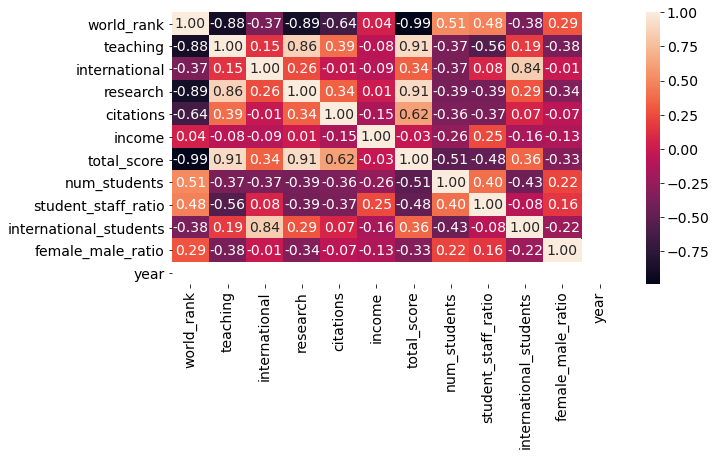

In [406]:
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

On remaque une correlation entre :
- Le classement mondial des unvinersités et le score universitaire pour la recherche (volume, revenu et réputation) (research)
- Le classement mondial des universités et le score universitaire pour l'enseignement (l'environnement d'apprentissage) (teaching)
- Le classement mondial des universités et score universitaire pour les citations (influence de la recherche) (citations)
- le score universitaire pour l'enseignement (l'environnement d'apprentissage) (teaching) et le score universitaire pour la recherche (reaserch)

Le coefficient de corrélation est compris entre -1, 1
 - Plus le coefficient est proche de 1, plus la relation linéaire positive entre les variables est forte.
 - Plus le coefficient est proche de -1, plus la relation linéaire négative entre les variables est forte.
 - Plus le coefficient est proche de 0, plus la relation linéaire entre les variables est faible.

In [407]:
import plotly.express as px
fig = px.scatter(df2, x="world_rank", y="research", color="world_rank")
fig.show()

In [408]:
import plotly.express as px
fig = px.scatter(df2, x="world_rank", y="teaching", color="world_rank")
fig.show()

In [409]:
import plotly.express as px
fig = px.scatter(df2, x="teaching", y="citations", color="world_rank")
fig.show()

In [410]:
import plotly.express as px
fig = px.scatter(df2, x="teaching", y="research", color="world_rank")
fig.show()

In [411]:
import plotly.express as px
fig = px.scatter(df2, x="citations", y="research", color="world_rank")
fig.show()

# ACP (Analyse en Composantes Principales)

# n_components=2
## 2 variables

In [412]:
from sklearn.preprocessing import StandardScaler


x = df[['research','citations']]#.values
#x=np.array(x)
#print(x)

y = df['world_rank'].values
#y = np.array(df['world_rank'])
#y = df['university_name']#.values
#print(y)
# Standardizing 
X = StandardScaler().fit_transform(x)
#print(X)

In [413]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [414]:
PCA = pca.fit_transform(x)
DF = pd.DataFrame(data = PCA
             , columns = ['principal component 1', 'principal component 2'])
DF.head(5)

,principal component 1,principal component 2
0,-17.659774,3.550801
1,-18.133569,5.120998
2,-16.580281,2.653752
3,-15.296796,5.301896
4,-10.287315,-1.612227


In [415]:
print(pca.explained_variance_ratio_)
print("---------------------------------")
print("sum explained_variance_ratio_ = ",pca.explained_variance_ratio_.sum())

[0.6806335 0.3193665]
---------------------------------
sum explained_variance_ratio_ =  1.0


In [416]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[114.00660169  53.49411813]
[0.6806335 0.3193665]
[0.6806335 1.       ]


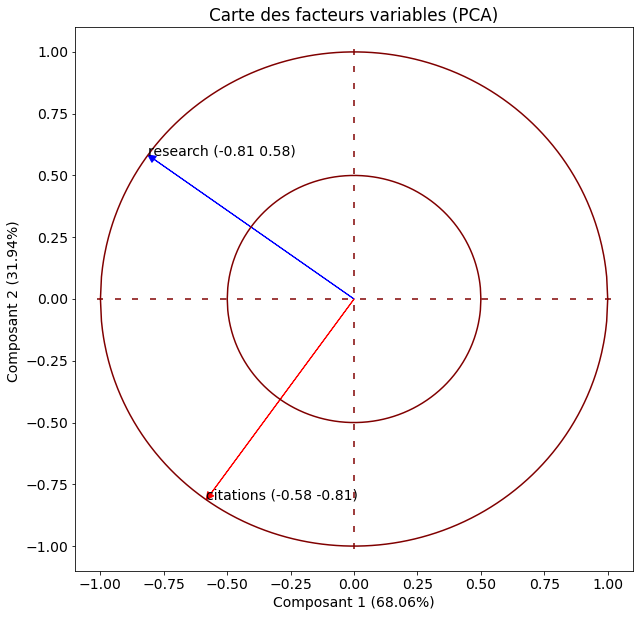

In [417]:
import matplotlib.pyplot as plt

x = df[['research','citations']]
columns=x.columns.values
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
pca_values=pca.components_
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
    
plt.xlabel (f"Composant 1 ({round (pca.explained_variance_ratio_ [0] * 100,2)}%)") 
plt.ylabel (f"Composant 2 ({round (pca.explained_variance_ratio_ [1] * 100,2 )}%) ") 
plt.title ('Carte des facteurs variables (PCA)') 
plt.show ()

## 10 variables

In [465]:
from sklearn.preprocessing import StandardScaler

x = df[['teaching','international','research','citations','income','total_score','num_students',
       'student_staff_ratio','international_students','female_male_ratio']]

y = df['world_rank']

X4= StandardScaler().fit_transform(x)


In [466]:
import numpy as np
from sklearn.decomposition import PCA

pca4 = PCA()#n_components=2)
pca4.fit(X4)

PCA()

In [468]:
PCA4 = pca4.fit_transform(X4)
DF = pd.DataFrame(data = PCA4
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                          'principal component 4', 'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8','principal component 9','principal component 10'])
DF.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,3.887536,-1.025370,2.102499,0.237546,0.039721,0.159574,-0.081355,-0.007287,0.406824,-0.001992
1,3.165608,0.567552,0.356510,-0.239416,-1.099713,-0.111547,0.369183,0.038582,-0.301195,-0.002294
2,3.193549,-0.928569,0.287704,-0.273070,-0.469197,0.030470,-0.193305,-0.440390,-0.162572,0.000970
3,3.005594,0.536749,-0.248973,-0.521790,-0.801832,-0.052664,-0.136463,-0.090164,-0.072786,0.002169
4,3.029596,0.197696,1.528022,0.281249,0.034970,-0.185058,0.650653,-0.472160,0.355353,0.004029


In [469]:
print(pca4.explained_variance_ratio_)
print("---------------------------------")
print("sum explained_variance_ratio_ = ",pca4.explained_variance_ratio_.sum())

[4.12650338e-01 1.78276776e-01 1.29214279e-01 9.47817562e-02
 7.70396442e-02 6.34773117e-02 2.26579017e-02 1.28159960e-02
 9.08487706e-03 1.11994737e-06]
---------------------------------
sum explained_variance_ratio_ =  1.0


In [470]:
print(pca4.explained_variance_)
print(pca4.explained_variance_ratio_)
print(pca4.explained_variance_ratio_.cumsum())

[4.22475346e+00 1.82521462e+00 1.32290809e+00 9.70384646e-01
 7.88739215e-01 6.49886763e-01 2.31973756e-01 1.31211388e-01
 9.30118366e-02 1.14661279e-05]
[4.12650338e-01 1.78276776e-01 1.29214279e-01 9.47817562e-02
 7.70396442e-02 6.34773117e-02 2.26579017e-02 1.28159960e-02
 9.08487706e-03 1.11994737e-06]
[0.41265034 0.59092711 0.72014139 0.81492315 0.89196279 0.95544011
 0.97809801 0.990914   0.99999888 1.        ]


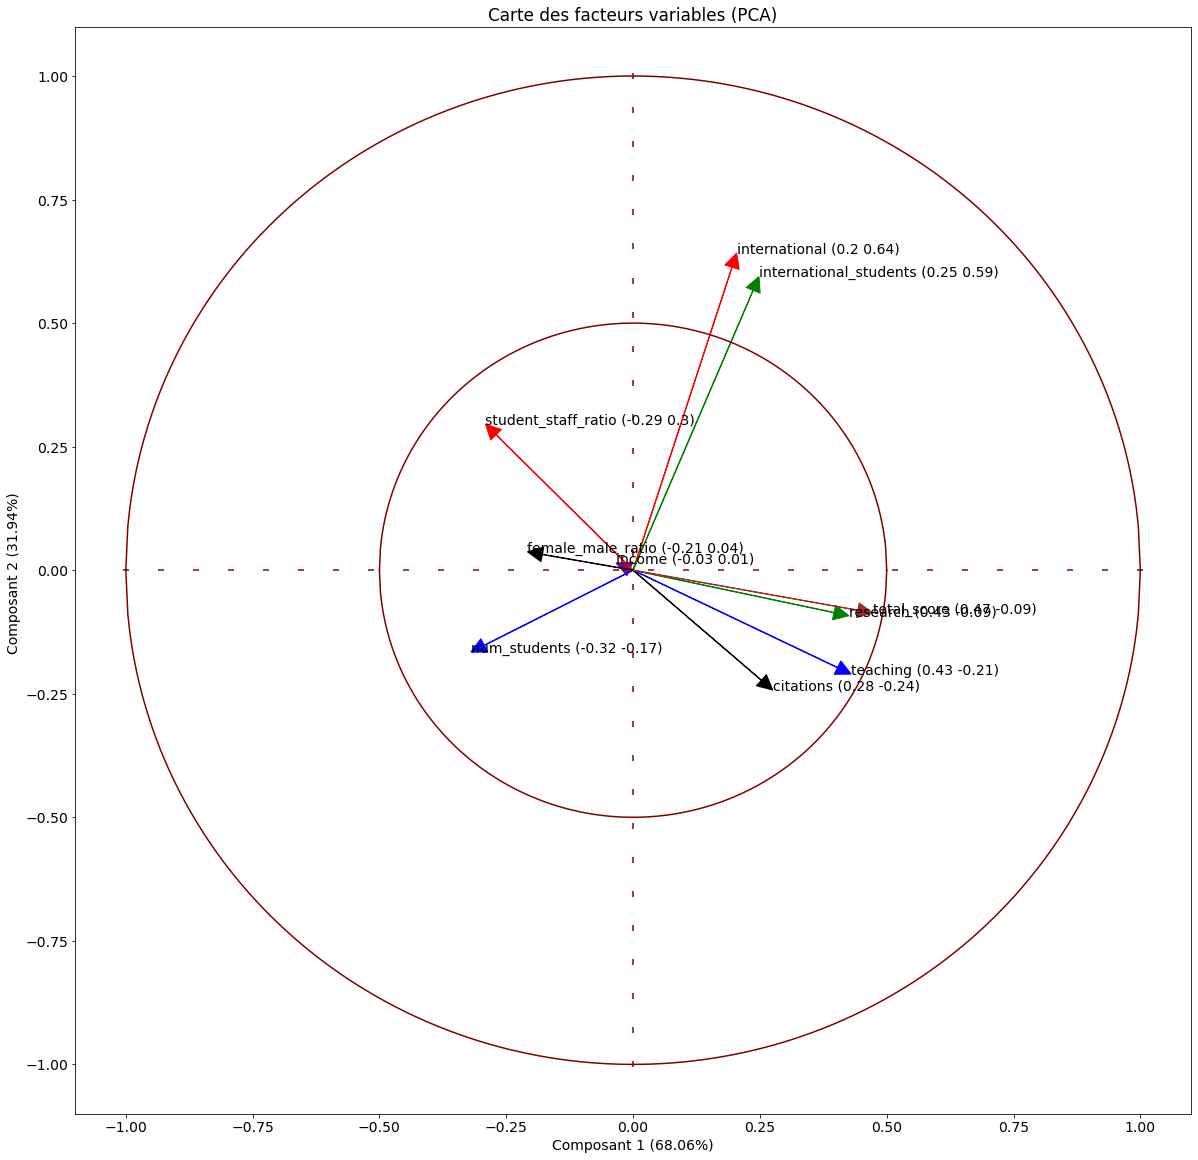

In [471]:
import matplotlib.pyplot as plt

x = df[['teaching','international','research','citations','income','total_score','num_students',
       'student_staff_ratio','international_students','female_male_ratio']]
columns=x.columns.values
 
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
pca_values=pca4.components_
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
    
plt.xlabel (f"Composant 1 ({round (pca.explained_variance_ratio_ [0] * 100,2)}%)") 
plt.ylabel (f"Composant 2 ({round (pca.explained_variance_ratio_ [1] * 100,2 )}%) ") 
plt.title ('Carte des facteurs variables (PCA)') 
plt.show ()

# n_components=3

In [297]:
from sklearn.preprocessing import StandardScaler

x = df[['research','citations','teaching']]
y = df['world_rank']

X1 = StandardScaler().fit_transform(x)


In [298]:
import numpy as np
from sklearn.decomposition import PCA

pca1 = PCA(n_components=3)
pca1.fit(X1)

PCA(n_components=3)

In [299]:
PCA1 = pca1.fit_transform(x)
DF = pd.DataFrame(data = PCA1
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
DF.head(5)

,principal component 1,principal component 2,principal component 3
0,29.473959,1.615386,-2.527102
1,23.305647,1.028112,4.336354
2,26.385736,0.560810,-1.562347
3,22.654881,2.562993,1.474424
4,19.428945,-1.674795,-5.306025


In [300]:
print(pca1.explained_variance_ratio_)
print("---------------------------------")
print("sum explained_variance_ratio_ = ",pca1.explained_variance_ratio_.sum())

[0.75057624 0.20013944 0.04928432]
---------------------------------
sum explained_variance_ratio_ =  1.0000000000000002


In [301]:
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_ratio_.cumsum())

[220.6740856   58.84224235  14.48989575]
[0.75057624 0.20013944 0.04928432]
[0.75057624 0.95071568 1.        ]


In [302]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

<Figure size 720x720 with 0 Axes>

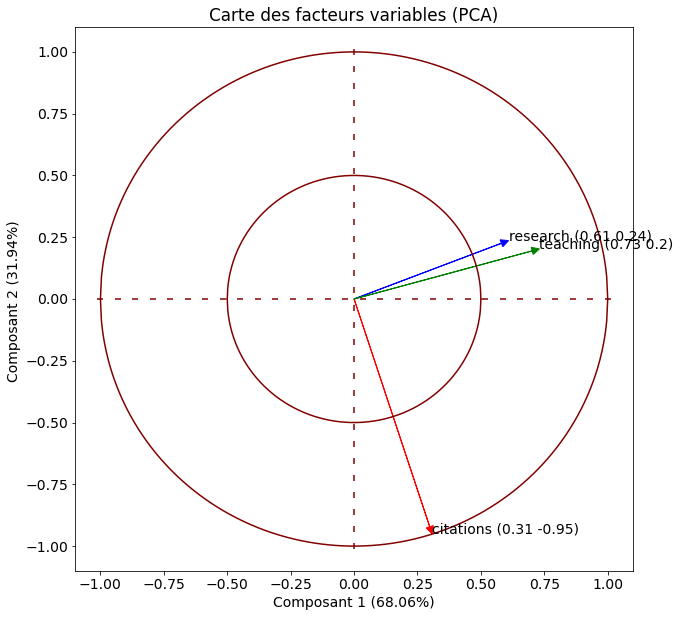

In [314]:
import matplotlib.pyplot as plt

x = df[['research','citations','teaching']]
columns=x.columns.values
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
pca_values=pca1.components_
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
    
plt.xlabel (f"Composant 1 ({round (pca.explained_variance_ratio_ [0] * 100,2)}%)") 
plt.ylabel (f"Composant 2 ({round (pca.explained_variance_ratio_ [1] * 100,2 )}%) ") 
plt.title ('Carte des facteurs variables (PCA)') 
plt.show ()

# n_components= 5

In [275]:
from sklearn.preprocessing import StandardScaler

x = df[['international','num_students','student_staff_ratio','international_students','female_male_ratio']]

y = df['world_rank']

X2 = StandardScaler().fit_transform(x)


In [276]:
import numpy as np
from sklearn.decomposition import PCA

pca2 = PCA(n_components=5)
pca2.fit(X2)

PCA(n_components=5)

In [277]:
PCA2 = pca2.fit_transform(x)
DF = pd.DataFrame(data = PCA2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                          'principal component 4', 'principal component 5'])
DF.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-3.891892,-24.418695,1.141708,2.837286,-0.280293
1,-26.883040,2.644227,-0.753035,-3.737629,-0.200445
2,-7.716459,-8.590227,0.864527,-6.660316,-0.361129
3,-24.805230,0.820148,-0.551292,-2.327418,-0.161787
4,-20.534269,-9.386838,-0.539749,-0.719692,-0.321958


In [278]:
print(pca2.explained_variance_ratio_)
print("---------------------------------")
print("sum explained_variance_ratio_ = ",pca2.explained_variance_ratio_.sum())

[7.08923247e-01 2.03709081e-01 5.29132293e-02 3.43059343e-02
 1.48508283e-04]
---------------------------------
sum explained_variance_ratio_ =  0.9999999999999999


In [279]:
print(pca2.explained_variance_)
print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_ratio_.cumsum())

[5.03628771e+02 1.44717717e+02 3.75902818e+01 2.43714050e+01
 1.05502316e-01]
[7.08923247e-01 2.03709081e-01 5.29132293e-02 3.43059343e-02
 1.48508283e-04]
[0.70892325 0.91263233 0.96554556 0.99985149 1.        ]


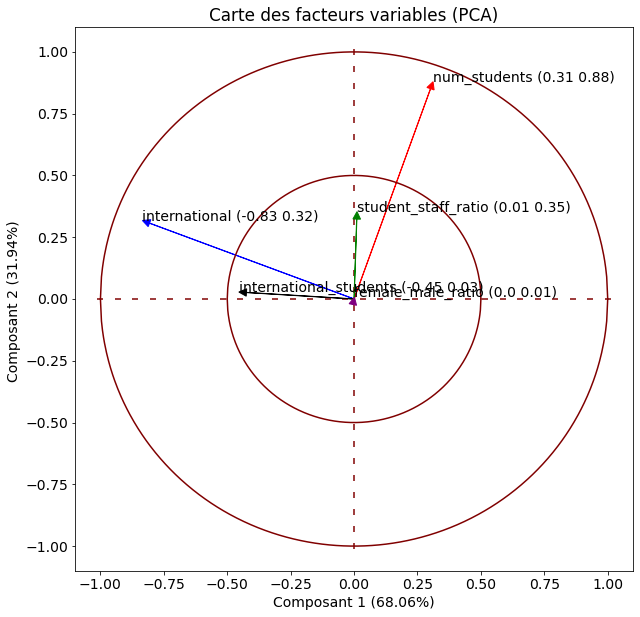

In [315]:
import matplotlib.pyplot as plt

x = df[['international','num_students','student_staff_ratio','international_students','female_male_ratio']]
columns=x.columns.values
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
pca_values=pca2.components_
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
    
plt.xlabel (f"Composant 1 ({round (pca.explained_variance_ratio_ [0] * 100,2)}%)") 
plt.ylabel (f"Composant 2 ({round (pca.explained_variance_ratio_ [1] * 100,2 )}%) ") 
plt.title ('Carte des facteurs variables (PCA)') 
plt.show ()

#  n_components = 10

In [280]:
from sklearn.preprocessing import StandardScaler

x = df[['teaching','international','research','citations','income','total_score','num_students',
       'student_staff_ratio','international_students','female_male_ratio']]

y = df['world_rank']

X3= StandardScaler().fit_transform(x)

In [281]:
import numpy as np
from sklearn.decomposition import PCA

pca3 = PCA(n_components=10)
pca3.fit(X3)

PCA(n_components=10)

In [282]:
PCA3 = pca3.fit_transform(x)
DF = pd.DataFrame(data = PCA3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                          'principal component 4', 'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8','principal component 9',
                         'principal component 10'])
DF.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-1.737297,42.219598,33.108174,-0.102671,2.946968,2.888549,1.588962,3.662412,0.028712,-0.016498
1,-28.728580,22.132332,9.041109,12.591747,-5.257124,-0.841979,-0.830681,-3.040247,-0.054277,-0.019006
2,-17.296869,9.129993,24.442001,6.027610,-0.775203,-6.151522,-1.057176,1.084862,-0.187058,0.007982
3,-33.549282,5.450936,10.748602,8.996188,-1.345327,-2.233411,1.721500,-0.022098,-0.018468,0.017910
4,-12.897282,40.966934,12.536504,3.455284,-3.058789,2.663028,-5.692577,5.316660,-0.069833,0.033269


In [283]:
print(pca3.explained_variance_ratio_)
print("---------------------------------")
print("sum explained_variance_ratio_ = ",pca3.explained_variance_ratio_.sum())

[3.66819573e-01 3.16605741e-01 1.81651644e-01 6.47850449e-02
 3.19769559e-02 1.69286543e-02 1.39708053e-02 7.20623149e-03
 5.48410545e-05 5.08902607e-07]
---------------------------------
sum explained_variance_ratio_ =  0.9999999999999999


In [284]:
print(pca3.explained_variance_)
print(pca3.explained_variance_ratio_)
print(pca3.explained_variance_ratio_.cumsum())

[5.65528795e+02 4.88113712e+02 2.80053854e+02 9.98796441e+01
 4.92991396e+01 2.60990475e+01 2.15389071e+01 1.11099072e+01
 8.45489111e-02 7.84579394e-04]
[3.66819573e-01 3.16605741e-01 1.81651644e-01 6.47850449e-02
 3.19769559e-02 1.69286543e-02 1.39708053e-02 7.20623149e-03
 5.48410545e-05 5.08902607e-07]
[0.36681957 0.68342531 0.86507696 0.929862   0.96183896 0.97876761
 0.99273842 0.99994465 0.99999949 1.        ]


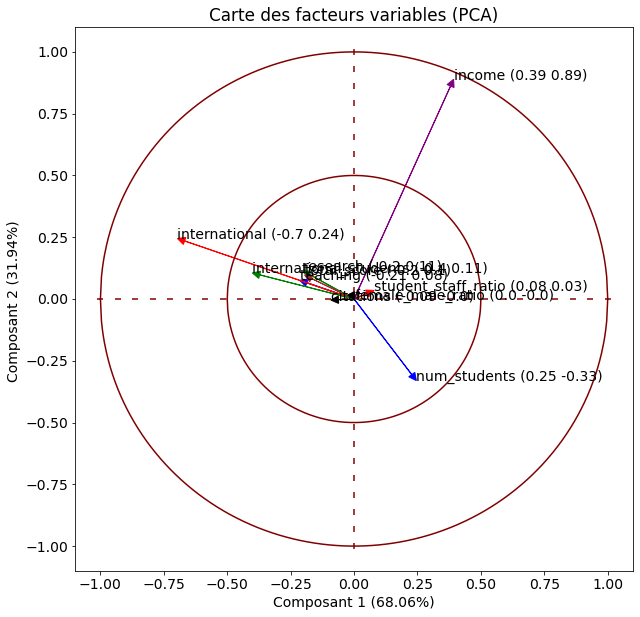

In [316]:
import matplotlib.pyplot as plt

x = df[['teaching','international','research','citations','income','total_score','num_students',
       'student_staff_ratio','international_students','female_male_ratio']]
columns=x.columns.values
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
pca_values=pca3.components_
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
    
plt.xlabel (f"Composant 1 ({round (pca.explained_variance_ratio_ [0] * 100,2)}%)") 
plt.ylabel (f"Composant 2 ({round (pca.explained_variance_ratio_ [1] * 100,2 )}%) ") 
plt.title ('Carte des facteurs variables (PCA)') 
plt.show ()

# statsmodels

In [ ]:
import numpy as np
from statsmodels.multivariate.pca import PCA

x = df[['research','citations','teaching']]
y = df['world_rank']

pc = PCA(x, ncomp=2, method='nipals')

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
x = df[['research','citations','teaching']]
y = df['world_rank']

In [ ]:
from statsmodels.sandbox.tools import pca
from sklearn.preprocessing import normalize
X_norm = normalize(X)
xred, fact, eva, eve = pca(X_norm, keepdim=2, normalize=True)